**Arbol de decisión**  

Un árbol de decisión es un algoritmo de aprendizaje supervisado no paramétrico, que se utiliza tanto para tareas de clasificación como de regresión. Tiene una estructura de árbol jerárquica, que consta de un nodo raíz, ramas, nodos internos y nodos hoja.

In [1]:
import pandas as pd
datos = pd.read_csv("DataSet.csv")

In [2]:
datos.head()

,Sucursal,Ciudad,TipoCliente,Género,LineaProducto,PrecioUnitario,Cantidad,Impuesto5%,Total,Fecha,Hora,MetodoPago,Calificación
0,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,9.1
1,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,9.6
2,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,7.4
3,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,8.4
4,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,5.3


In [3]:
datos.describe()

,PrecioUnitario,Cantidad,Impuesto5%,Total,Calificación
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,6.97270
std,26.494628,2.923431,11.708825,245.885335,1.71858
min,10.080000,1.000000,0.508500,10.678500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,5.50000
50%,55.230000,5.000000,12.088000,253.848000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,10.00000


<Axes: xlabel='Cantidad', ylabel='count'>

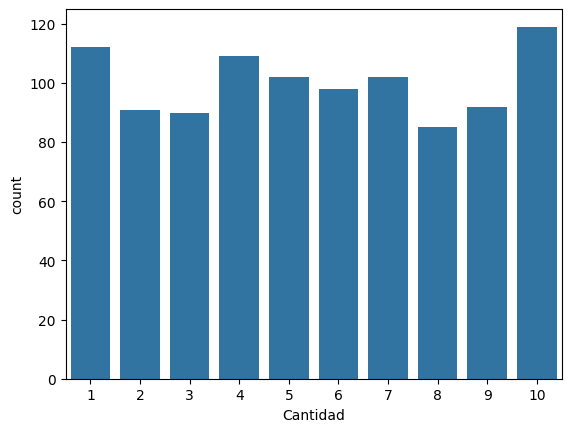

In [4]:
import seaborn as sb
sb.countplot(x="Cantidad", data=datos)

<Axes: xlabel='Cantidad', ylabel='count'>

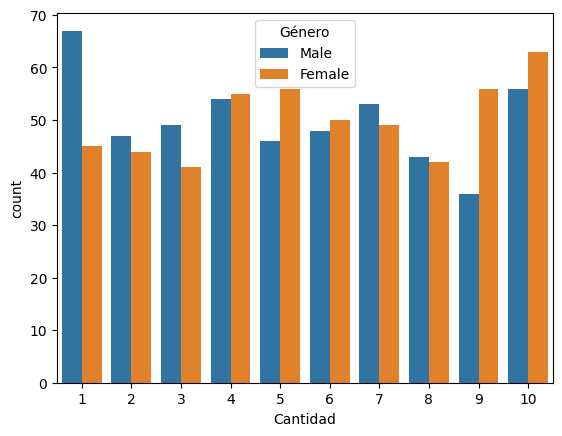

In [5]:
sb.countplot(x="Cantidad", data=datos, hue="Género")

In [6]:
datos.isna().sum()

,0
Sucursal,0
Ciudad,0
TipoCliente,0
Género,0
LineaProducto,0
PrecioUnitario,0
Cantidad,0
Impuesto5%,0
Total,0
Fecha,0


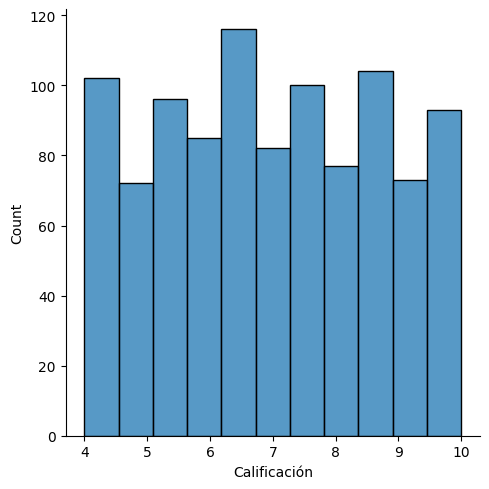

In [7]:
sb.displot(x="Calificación", data=datos)

In [8]:
datos["Calificación"]

,Calificación
0,9.1
1,9.6
2,7.4
3,8.4
4,5.3
...,...
995,6.2
996,4.4
997,7.7
998,4.1


In [9]:
datos["Calificación"].mean()

6.9727

In [10]:
datos["Calificación"].fillna(datos["Calificación"].mean())

,Calificación
0,9.1
1,9.6
2,7.4
3,8.4
4,5.3
...,...
995,6.2
996,4.4
997,7.7
998,4.1


In [11]:
datos["Calificación"] = datos["Calificación"].fillna(datos["Calificación"].mean())

In [12]:
datos["Calificación"]

,Calificación
0,9.1
1,9.6
2,7.4
3,8.4
4,5.3
...,...
995,6.2
996,4.4
997,7.7
998,4.1


In [13]:
datos.isna().sum()

,0
Sucursal,0
Ciudad,0
TipoCliente,0
Género,0
LineaProducto,0
PrecioUnitario,0
Cantidad,0
Impuesto5%,0
Total,0
Fecha,0


In [15]:
datos = datos.drop(["Ciudad"], axis=1)

In [16]:
datos["Sucursal"].value_counts()

,count
Sucursal,
A,340
B,332
C,328


In [17]:
datos = datos.dropna()

In [18]:
datos.head()

,Sucursal,TipoCliente,Género,LineaProducto,PrecioUnitario,Cantidad,Impuesto5%,Total,Fecha,Hora,MetodoPago,Calificación
0,A,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,9.1
1,C,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,9.6
2,A,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,7.4
3,A,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,8.4
4,A,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,5.3


In [19]:
datos = datos.drop(["LineaProducto", "TipoCliente", "PrecioUnitario"], axis=1)

In [20]:
dummies_sex = pd.get_dummies(datos["Género"], drop_first=True)

In [21]:
datos = datos.join(dummies_sex)
datos = datos.drop(["Género"], axis=1)

<Axes: xlabel='Cantidad', ylabel='count'>

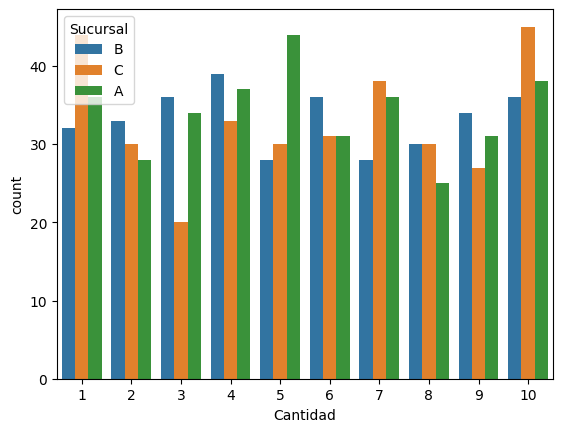

In [22]:
sb.countplot(x="Cantidad", data=datos, hue="Sucursal")

In [23]:
dummies_embarked = pd.get_dummies(datos["Sucursal"], drop_first=True)

In [24]:
datos = datos.join(dummies_embarked)
datos = datos.drop(["Sucursal"], axis=1)

In [28]:
sb.heatmap(datos.corr(), annot=True, cmap="Total")

ValueError: could not convert string to float: '1/5/2019'

<Axes: xlabel='Survived', ylabel='count'>

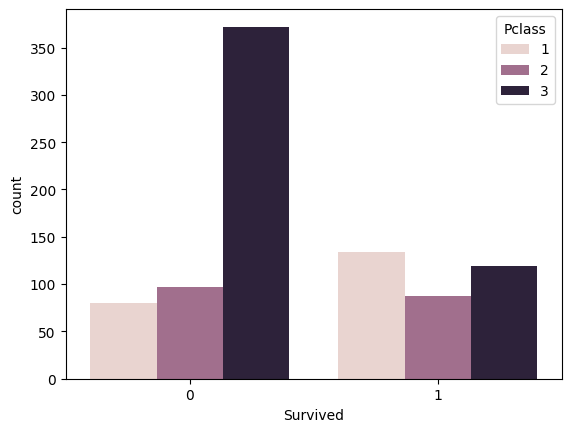

In [ ]:
sb.countplot(x="Survived", data=datos, hue="Pclass")

In [ ]:
X = datos.drop(["Survived"], axis=1)
y = datos["Survived"]

In [ ]:
from sklearn.model_selection import train_test_split

X_ent, X_pru, y_ent, y_pru = train_test_split(X, y, test_size=.2)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

modelo = DecisionTreeClassifier(max_depth=10)
modelo.fit(X_ent, y_ent)
predicciones = modelo.predict(X_pru)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pru, predicciones)

0.7415730337078652

In [ ]:
from sklearn.tree import DecisionTreeClassifier

resultados = []
for i in range(1,15):
  modelo = DecisionTreeClassifier(max_depth=i)
  modelo.fit(X_ent, y_ent)
  predicciones = modelo.predict(X_pru)
  exactitud = accuracy_score(y_pru, predicciones)
  print(f"Resultado para {i}: {exactitud}")
  resultados.append(exactitud)

Resultado para 1: 0.7415730337078652
Resultado para 2: 0.7471910112359551
Resultado para 3: 0.7640449438202247
Resultado para 4: 0.7640449438202247
Resultado para 5: 0.7528089887640449
Resultado para 6: 0.7752808988764045
Resultado para 7: 0.7584269662921348
Resultado para 8: 0.7191011235955056
Resultado para 9: 0.7584269662921348
Resultado para 10: 0.7528089887640449
Resultado para 11: 0.7584269662921348
Resultado para 12: 0.7640449438202247
Resultado para 13: 0.7528089887640449
Resultado para 14: 0.7359550561797753


<Axes: >

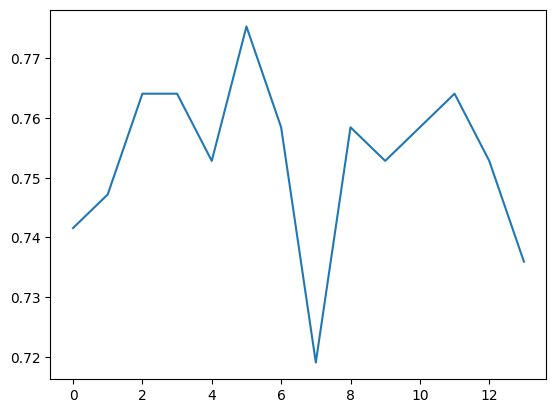

In [ ]:
sb.lineplot(data=resultados)

In [ ]:
modelo = DecisionTreeClassifier(max_depth=8)
modelo.fit(X_ent, y_ent)
predicciones = modelo.predict(X_pru)
exactitud = accuracy_score(y_pru, predicciones)

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_pru, predicciones))

              precision    recall  f1-score   support

           0       0.75      0.78      0.77       106
           1       0.66      0.62      0.64        72

    accuracy                           0.72       178
   macro avg       0.71      0.70      0.71       178
weighted avg       0.72      0.72      0.72       178



In [ ]:
from sklearn.metrics import confusion_matrix
pd.DataFrame(confusion_matrix(y_pru, predicciones), columns=["Pred: No", "Pred: Si"], index=["Real: No", "Real: Si"])

,Pred: No,Pred: Si
Real: No,83,23
Real: Si,27,45


In [ ]:
X_ent.columns

Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'male', 'Q', 'S'], dtype='object')

[Text(0.44979166666666665, 0.9444444444444444, 'male <= 0.5\n0.47\n711\n[443, 268]\nMurió'),
 Text(0.25083333333333335, 0.8333333333333334, 'Pclass <= 2.5\n0.364\n238\n[57, 181]\nVivió'),
 Text(0.09333333333333334, 0.7222222222222222, 'Age <= 2.5\n0.117\n128\n[8, 120]\nVivió'),
 Text(0.08, 0.6111111111111112, '0.0\n1\n[1, 0]\nMurió'),
 Text(0.10666666666666667, 0.6111111111111112, 'Fare <= 29.356\n0.104\n127\n[7, 120]\nVivió'),
 Text(0.08, 0.5, 'Age <= 55.5\n0.219\n48\n[6, 42]\nVivió'),
 Text(0.06666666666666667, 0.3888888888888889, 'Fare <= 28.231\n0.19\n47\n[5, 42]\nVivió'),
 Text(0.05333333333333334, 0.2777777777777778, 'Age <= 37.0\n0.159\n46\n[4, 42]\nVivió'),
 Text(0.02666666666666667, 0.16666666666666666, 'Age <= 26.5\n0.105\n36\n[2, 34]\nVivió'),
 Text(0.013333333333333334, 0.05555555555555555, '0.198\n18\n[2, 16]\nVivió'),
 Text(0.04, 0.05555555555555555, '0.0\n18\n[0, 18]\nVivió'),
 Text(0.08, 0.16666666666666666, 'Age <= 40.0\n0.32\n10\n[2, 8]\nVivió'),
 Text(0.0666666666666

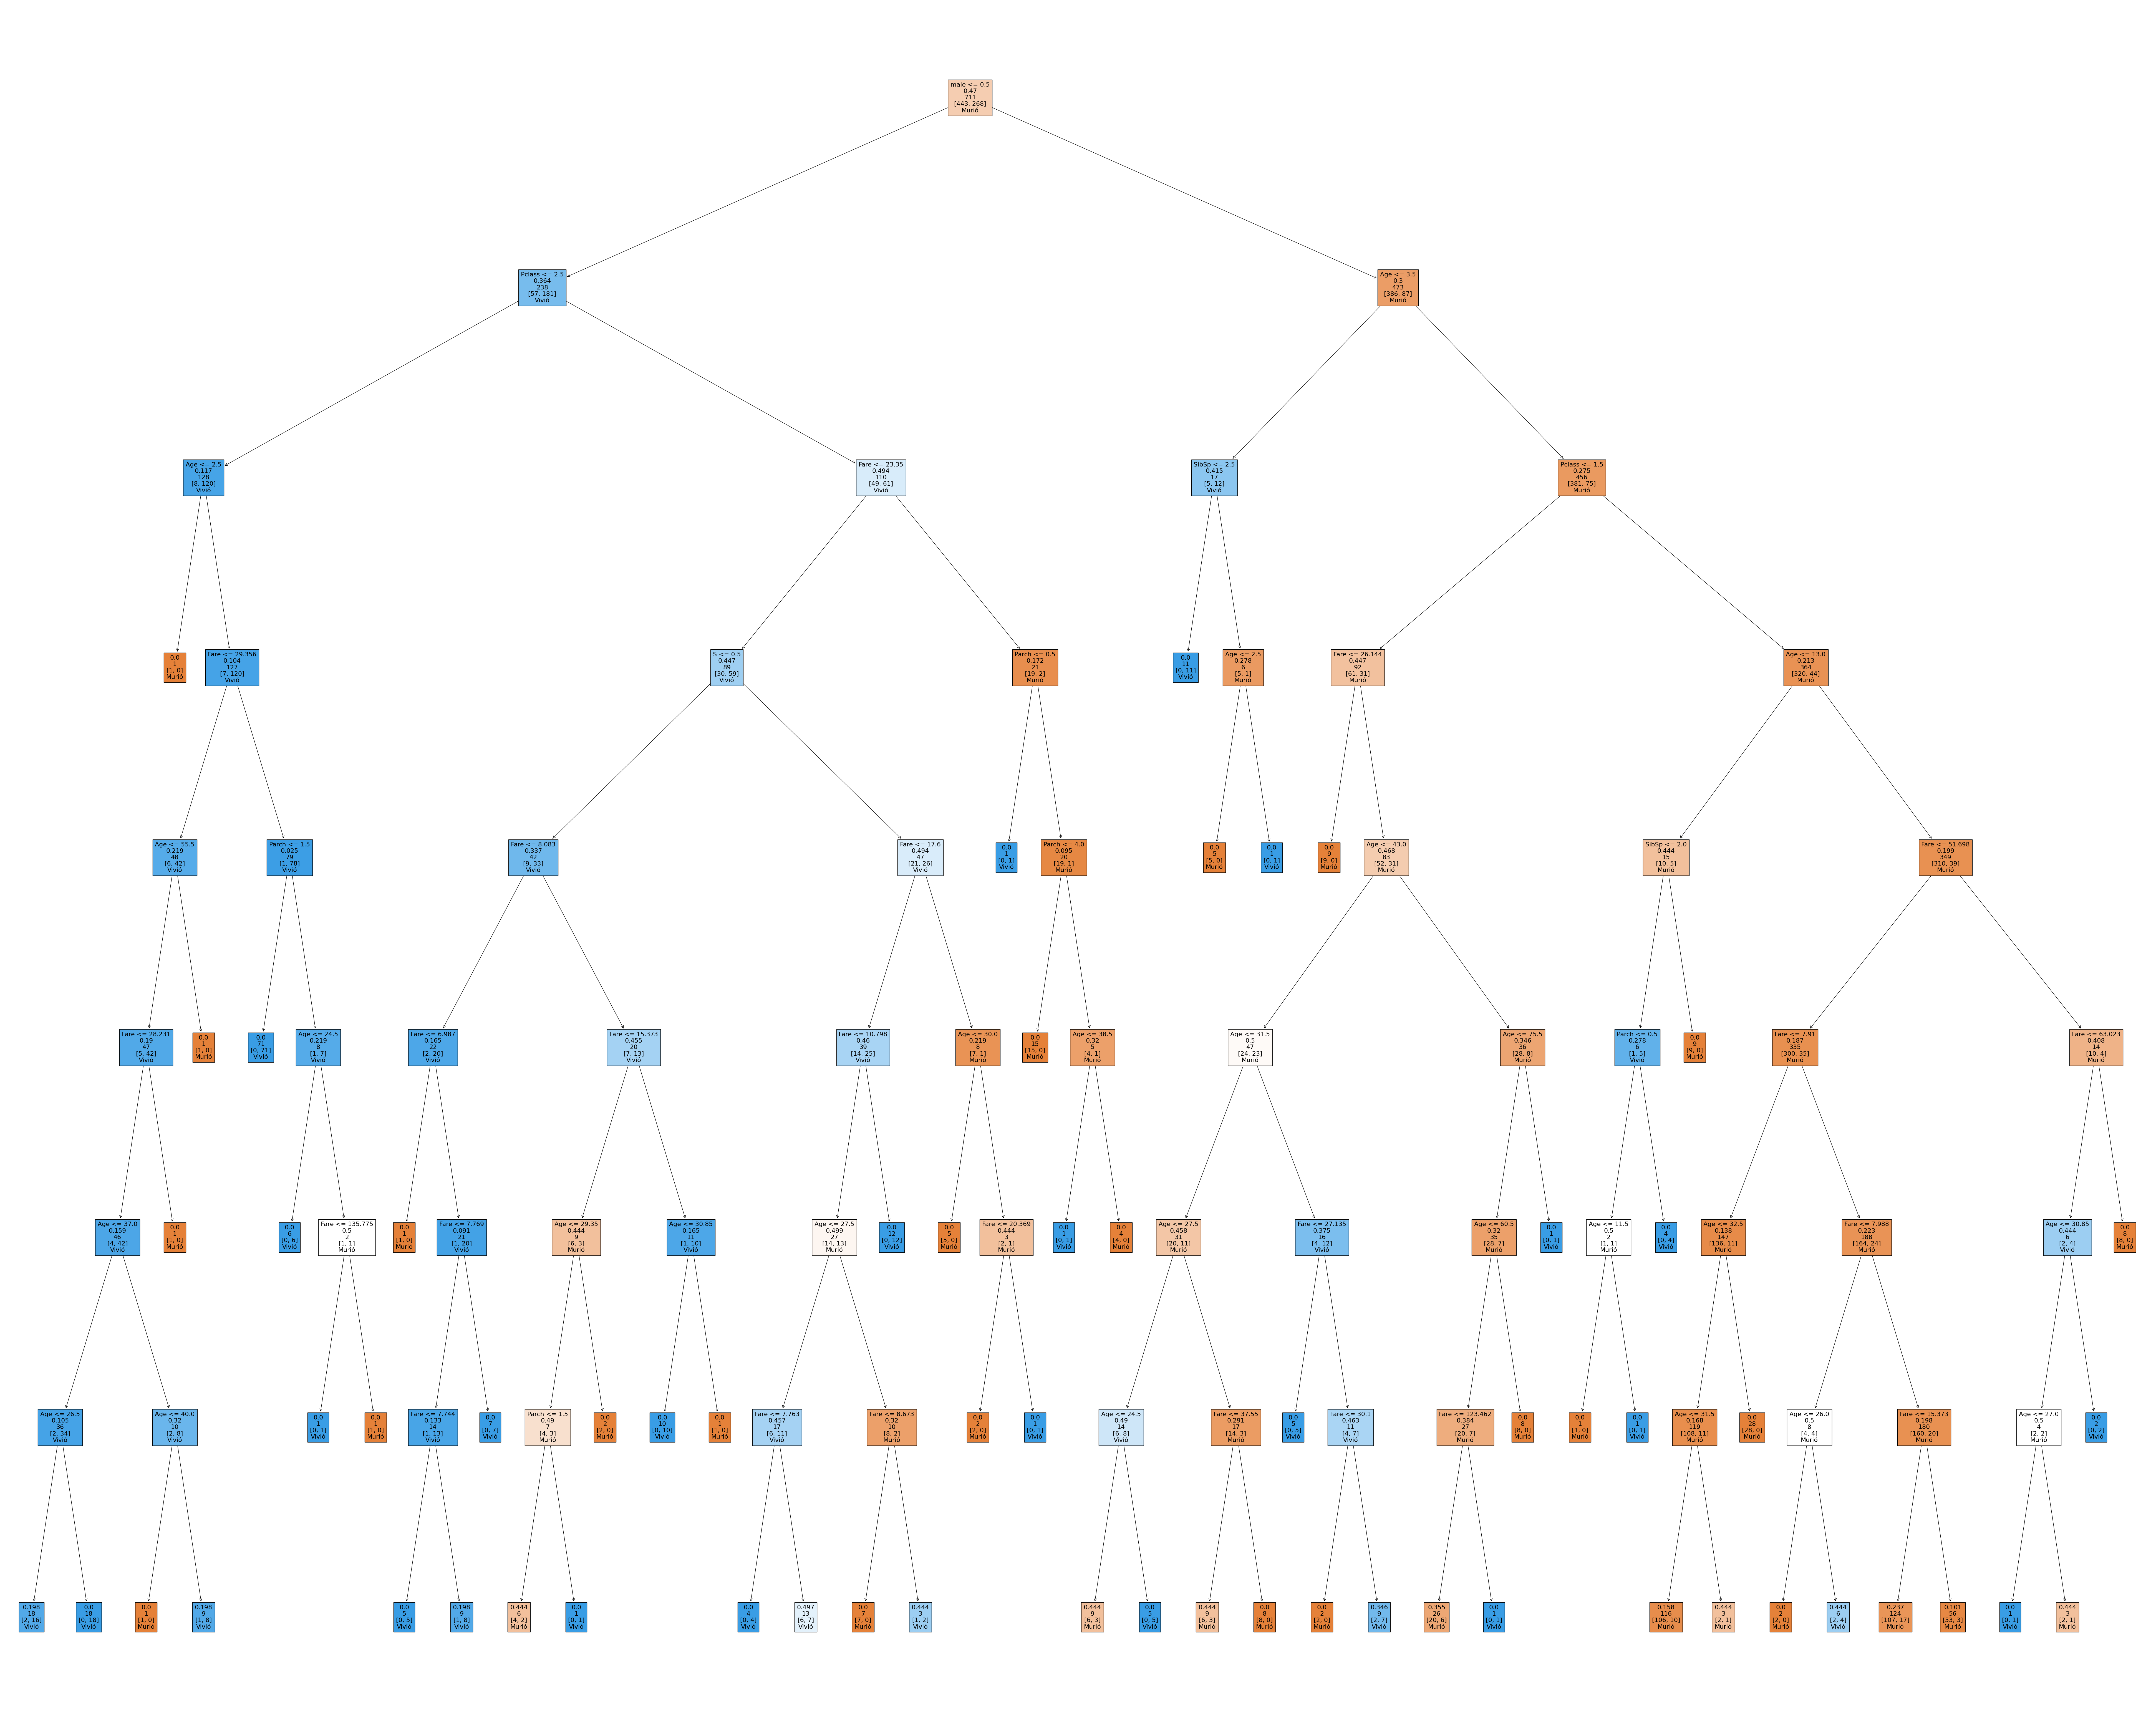

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(100, 80))
plot_tree(
    modelo,
    feature_names=X_ent.columns,
    class_names=["Murió", "Vivió"],
    filled=True, label="none"
)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pru, predicciones)

0.7191011235955056

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_pru, predicciones))

              precision    recall  f1-score   support

           0       0.75      0.78      0.77       106
           1       0.66      0.62      0.64        72

    accuracy                           0.72       178
   macro avg       0.71      0.70      0.71       178
weighted avg       0.72      0.72      0.72       178



In [ ]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_pru, predicciones)

array([[83, 23],
       [27, 45]])

In [ ]:
pd.DataFrame(confusion_matrix(y_pru, predicciones), columns=["Pred: No", "Pred: Si"], index=["Real: No", "Real: Si"])

,Pred: No,Pred: Si
Real: No,83,23
Real: Si,27,45


In [ ]:
X.head()

,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,3,22.0,1,0,7.2500,True,False,True
1,1,38.0,1,0,71.2833,False,False,False
2,3,26.0,0,0,7.9250,False,False,True
3,1,35.0,1,0,53.1000,False,False,True
4,3,35.0,0,0,8.0500,True,False,True


In [ ]:
nueva_persona = [2, 35, 0, 0, 80, 0, 0, 0]
prediccion = modelo.predict([nueva_persona])
if prediccion[0] == 1:
  print("Sobreviviste")
else:
  print("No sobreviviste")

Sobreviviste


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
